<a href="https://colab.research.google.com/github/sebkaz/teaching/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
class Perceptron():
    '''My first perception class '''
    
    def __init__(self, eta=0.01,n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors +=int(update !=0.0)
                # print(self.w_, errors)

            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)   

In [2]:

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [5]:
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
y = df.iloc[0:100, 4].values

In [4]:
y = np.where(y == 'Iris-setosa', -1, 1)

In [5]:
X = df.iloc[0:100, [0,2]].values

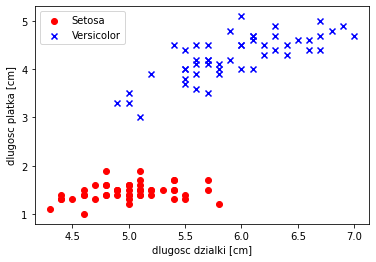

In [6]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='Versicolor')
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

## Zadanie 1. - wybierz dwie inne zmienne i sprawdź ich separowalność liniową. 

## Zadanie 2. - dodać mechanizm zamieniający kolejność w próbkach i pokazać, że to poprawia szybkość uczenia.  [Kody](https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch02/ch02.ipynb)



In [10]:
ppn = Perceptron()
ppn.fit(X,y)

In [11]:
ppn.w_

array([-0.04 , -0.068,  0.182])

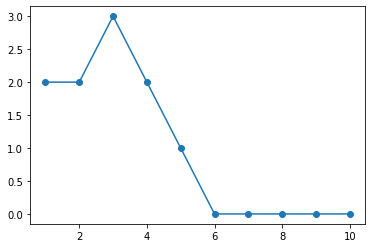

In [13]:
plt.plot(range(1,len(ppn.errors_)+1), ppn.errors_, marker='o')

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier, resolution=0.02):
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max()+1
    x2_min, x2_max = X[:,1].min() -1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0], y=X[y==cl,1], alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


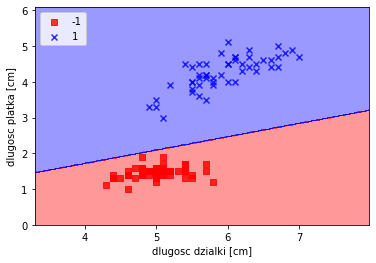

In [15]:
plot_decision_regions(X,y,classifier=ppn)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [16]:
ppn.w_

array([-0.04 , -0.068,  0.182])

$\phi(z) = w_i x^i $ 

$z = w_i x^i$


### zdefiniujmy funkcję celu 

Funkcję tą będziemy optymalizować.

Specjalny typ f. celu = f. kosztu.

Adeline 

SSE = sum of squared errors

$J = \frac{1}{2}\sum(y^{(i)}-\phi(z^{(i)})^2$


$w = w + \Delta w$

$\Delta w = -\eta \nabla J(w)$ - `Gradient Descent` !!! - spadek po gradiencie. 


$ - \sum(y^{(i)}-\phi(z^{(i)})x $ 

In [54]:
class Adaline():
    '''Klasyfikator  - ADAptacyjny LIniowy NEuron'''
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X,y):
        self.w_ = np.zeros(1+X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(X)
            errors = (y-output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)   

In [64]:
ad = Adaline(n_iter=20, eta=0.0001)

In [24]:
p = Perceptron()

In [65]:
ad.fit(X,y)

In [66]:
ad.w_

array([-0.02592095, -0.06047391,  0.17139048])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


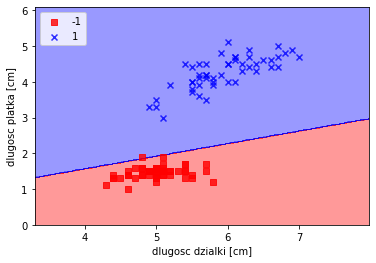

In [67]:
plot_decision_regions(X,y,classifier=ad)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [68]:
ad.cost_

[50.0,
 48.06916268602549,
 46.75624785073664,
 45.67588152905384,
 44.6913293479668,
 43.75388836192351,
 42.84602748758452,
 41.961257613784404,
 41.09700496411307,
 40.252087948337085,
 39.42582377021973,
 38.617712013922116,
 37.827322498502454,
 37.05425545135596,
 36.298127287139835,
 35.55856545435926,
 34.835206494740945,
 34.12769524256161,
 33.4356844300396,
 32.75883443891833]

In [69]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


In [70]:
a2 = Adaline()
p2 = Perceptron()

In [71]:
a2.fit(X_std,y)
p2.fit(X_std, y)

In [72]:
p2.w_

array([ 0.02      , -0.00535646,  0.04215628])

In [73]:
a2.w_

array([ 3.40838469e-16, -1.53568950e-01,  9.73264237e-01])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


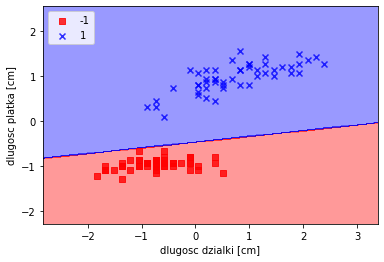

In [76]:
plot_decision_regions(X_std,y,classifier=p2)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [77]:
a3 = Adaline(n_iter=20, eta=0.0001)

In [78]:
a3.fit(X_std,y)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


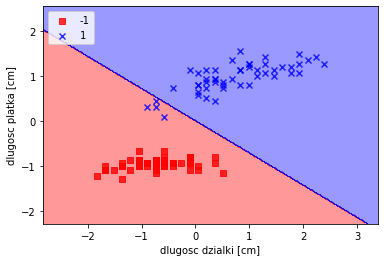

In [79]:
plot_decision_regions(X_std,y,classifier=a3)
plt.xlabel("dlugosc dzialki [cm]")
plt.ylabel("dlugosc platka [cm]")
plt.legend(loc='upper left')
plt.show()

In [81]:
a3.cost_

[50.0,
 48.541875121485816,
 47.135186547452044,
 45.77809023966913,
 44.468808383297215,
 43.20562700823724,
 41.986893695921154,
 40.81101536847265,
 39.676456157279326,
 38.58173534812421,
 37.525425400126494,
 36.50615003584045,
 35.52258239995633,
 34.57344328413952,
 33.657499415631754,
 32.773561807324754,
 31.920484167097573,
 31.097161364289555,
 30.302527951256106,
 29.535556738029175]